## Dimensionality reduction

In [40]:
import pandas as pd
import re
import sklearn
#from sklearn.pipeline import Pipeline

from stop_words import get_stop_words
stopwords = get_stop_words('russian')
import numpy as np

In [41]:
from tqdm import tqdm

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
%matplotlib inline

In [6]:
articles_df = pd.read_csv('articles_lemm_meta.tsv', sep = '\t', encoding = 'utf-8')

In [7]:
articles_good_rubrics = articles_df[articles_df.final_rubrics != 'Мусор']
articles_good_rubrics = articles_good_rubrics.reset_index(drop = True)
articles_good_rubrics.shape

(24611, 13)

In [44]:
articles_good_rubrics.head()

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
0,chrdk.ru/articles/sci_10_salt_lakes.txt,https://chrdk.ru/,https://chrdk.ru/sci/10_salt_lakes,16.08.2017,Десять самых известных соленых озер,NaN,Егор Задереев,География_Экология,Статьи,Науки о земле|Науки о земле,Науки о земле,One,возможно знать объём вода пресный солёный озер...
1,chrdk.ru/articles/sci_33_fractures.txt,https://chrdk.ru/,https://chrdk.ru/sci/33_fractures,08.08.2017,33 перелома,Скелет мужчины с 33 переломами нашли археологи...,Екатерина Боровикова,Российская наука_Антропология,Статьи,История|Мусор,История,One,останки мужчина зажить перелом найти раскопка ...
2,chrdk.ru/articles/sci_46_chromosomes.txt,https://chrdk.ru/,https://chrdk.ru/sci/46_chromosomes,04.08.2017,46 — норма?,Считаем хромосомы: сколько человеку для счасть...,Полина Лосева,Генетика_Медицина,Статьи,Физиология человека|Физиология человека,Физиология человека,One,отличие зуб хромосома человек положить строго ...
3,chrdk.ru/articles/sci_750gev.txt,https://chrdk.ru/,https://chrdk.ru/sci/750gev,23.08.2016,Несбывшиеся надежды на новую физику,Какие «страшные сценарии» физики хотели забыть...,Екатерина Боровикова,Физика_Интервью_Закрытия,Статьи,Мусор|Мусор|Физика,Физика,One,начало август cern официально объявить частица...
4,chrdk.ru/articles/sci_alien_anatomy.txt,https://chrdk.ru/,https://chrdk.ru/sci/alien_anatomy,22.05.2017,Анатомия каменных пришельцев,Спецпроект «Чердака» и «Красивой науки»,NaN,Геология_Космос,Статьи,Космос|Науки о земле,Космос,Multi,выглядеть отличаться друг друг гость различный...


In [9]:
len_texts = articles_good_rubrics['text'].apply(len)

In [10]:
len_texts.describe()

count     24611.000000
mean       4316.547560
std        7246.661086
min           4.000000
25%        1447.500000
50%        2240.000000
75%        4627.500000
max      166478.000000
Name: text, dtype: float64

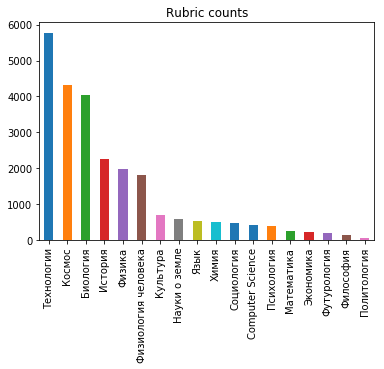

In [16]:
plt.title("Rubric counts")
articles_good_rubrics.final_rubrics.value_counts().plot(kind='bar')
#plt.figure(figsize=(8, 6))
plt.show()

## Latent Semantic Model

SVD to reduce dimensionality

In [54]:
from gensim.corpora import *
from gensim.models import *

In [96]:
max_features = 3000

In [97]:
texts = [articles_good_rubrics.text.iloc[i].split() for i in range(len(articles_good_rubrics))]
word_dict = Dictionary(texts) #fit dictionary of words indices
#dictionary.add_documents(list of docs) - update dictionary
word_dict.filter_n_most_frequent(max_features) 
corpus = [word_dict.doc2bow(text) for text in texts] #encode texts with words indices and their counts in text

In [98]:
list(word_dict.items())[:10]

[(0, 'astrobiology'),
 (1, 'cоленый'),
 (2, 'erectus'),
 (3, 'extreme'),
 (4, 'habilis'),
 (5, 'homo'),
 (6, 'microbiome'),
 (7, 'project'),
 (8, 'амударья'),
 (9, 'анда')]

In [99]:
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 5), (14, 1), (15, 1), (16, 1), (17, 3), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 3), (30, 1), (31, 2), (32, 12), (33, 1), (34, 2), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 2), (52, 1), (53, 1), (54, 1), (55, 2), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 3), (64, 3), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 3), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 2), (83, 5), (84, 1), (85, 1), (86, 5), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 2), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 43), (103, 21), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 

In [100]:
k = 0
for item in corpus:
    if not(item):
        k += 1
print(k)

2


In [101]:
print(corpus[24000])

[(26, 1), (68, 2), (84, 1), (210, 1), (211, 8), (234, 6), (235, 1), (245, 50), (246, 1), (259, 3), (267, 1), (268, 17), (269, 8), (274, 1), (276, 3), (281, 1), (303, 1), (304, 1), (311, 2), (411, 1), (475, 1), (675, 1), (711, 1), (769, 1), (789, 2), (906, 1), (986, 2), (1063, 1), (1167, 1), (1281, 1), (1299, 1), (1426, 2), (1599, 3), (1618, 1), (1717, 1), (1807, 1), (1816, 1), (2009, 3), (2012, 1), (2060, 1), (2359, 2), (2472, 2), (2563, 1), (2670, 1), (2674, 2), (2721, 1), (2866, 2), (2920, 1), (3050, 1), (3148, 7), (3314, 1), (3452, 1), (3465, 1), (3493, 1), (3515, 1), (3615, 1), (3744, 1), (3777, 1), (3801, 1), (3887, 1), (4106, 3), (4111, 1), (4129, 1), (4279, 1), (4311, 1), (4332, 1), (4480, 1), (4500, 1), (4578, 1), (4667, 1), (4699, 1), (4777, 2), (4805, 1), (4831, 1), (4897, 1), (5380, 1), (5399, 1), (5465, 1), (5489, 1), (5564, 1), (5578, 1), (5584, 4), (5591, 1), (5599, 1), (5600, 1), (5673, 3), (5679, 1), (5692, 2), (5719, 2), (5752, 1), (5754, 1), (5755, 1), (5808, 1), (581

In [102]:
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [103]:
lsi = lsimodel.LsiModel(corpus = corpus_tfidf, id2word = word_dict, num_topics = 2)

In [104]:
X = [0] * len(articles_good_rubrics)
Y = [0] * len(articles_good_rubrics)
for i in range(len(articles_good_rubrics)):
    vect = corpus[i]
    LSI_topics = (lsi[vect])
    try:
        for topic in LSI_topics:
            if topic[0] == 0:
                if topic[1] < 5:
                    X[i] = topic[1]
                else:
                    continue 
            elif topic[0] == 1:
                Y[i] = topic[1]
    except:
        pass
topics_df = pd.DataFrame({'X': X, 'Y': Y, 'topic' : articles_good_rubrics.final_rubrics})

In [89]:
for topic in lsi[corpus[20000]]:
    print(topic)

(0, 0.000803242670495636)
(1, 0.003179004222941047)


In [105]:
topics_df.head()

,X,Y,topic
0,1.924541,1.619150,Науки о земле
1,0.461896,0.759198,История
2,1.335969,2.154298,Физиология человека
3,0.368165,0.668891,Физика
4,0.014661,0.021337,Космос


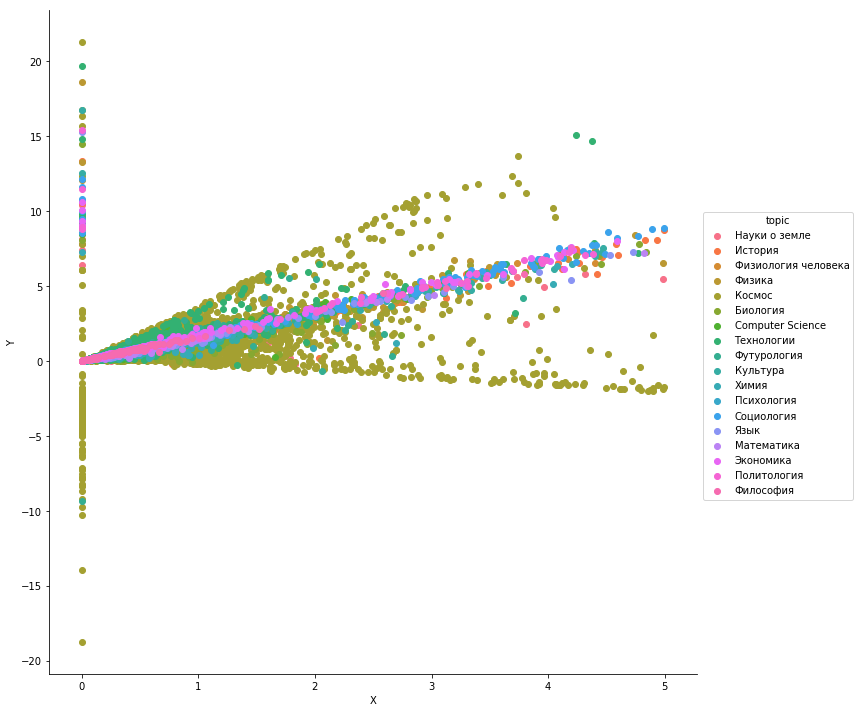

In [106]:
sns.FacetGrid(topics_df, hue = "topic", size=10).map(plt.scatter, "X", "Y").add_legend()

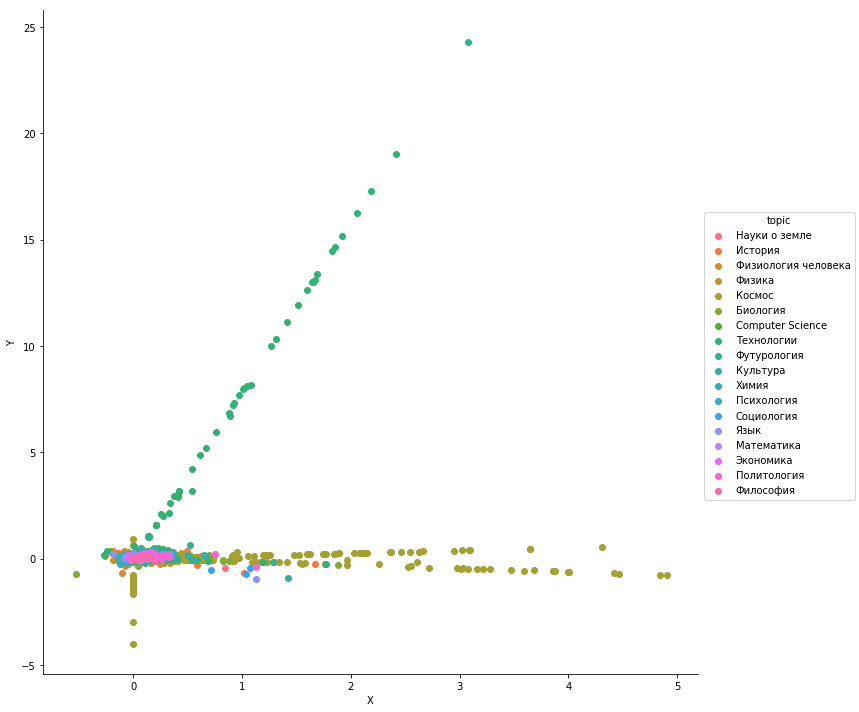

In [39]:
#max_features = 10000
sns.FacetGrid(topics_df, hue = "topic", size=10).map(plt.scatter, "X", "Y").add_legend()

## tSNE

In [90]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *


In [92]:
tfidf_vect = TfidfVectorizer(min_df = 2, stop_words = stopwords, max_features = 75000).fit_transform(articles_good_rubrics.text)

In [93]:
X_reduced = TruncatedSVD(n_components=100, random_state=0).fit_transform(tfidf_vect)

In [94]:
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 24611 samples in 0.225s...
[t-SNE] Computed neighbors for 24611 samples in 184.076s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24611
[t-SNE] Computed conditional probabilities for sample 2000 / 24611
[t-SNE] Computed conditional probabilities for sample 3000 / 24611
[t-SNE] Computed conditional probabilities for sample 4000 / 24611
[t-SNE] Computed conditional probabilities for sample 5000 / 24611
[t-SNE] Computed conditional probabilities for sample 6000 / 24611
[t-SNE] Computed conditional probabilities for sample 7000 / 24611
[t-SNE] Computed conditional probabilities for sample 8000 / 24611
[t-SNE] Computed conditional probabilities for sample 9000 / 24611
[t-SNE] Computed conditional probabilities for sample 10000 / 24611
[t-SNE] Computed conditional probabilities for sample 11000 / 24611
[t-SNE] Computed conditional probabilities for sample 12000 / 24611
[t-SNE] Computed conditional probabilities for 

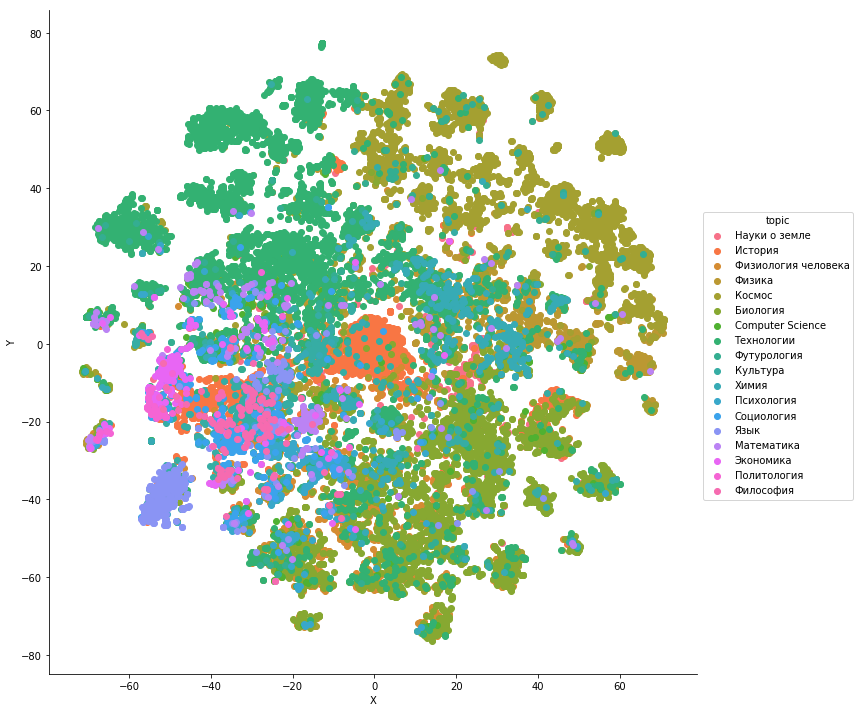

In [95]:
tsne_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : articles_good_rubrics.final_rubrics})
sns.FacetGrid(tsne_df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()